<a href="https://colab.research.google.com/github/thejayden/IM4483-Mini-Proj/blob/master/im4483_tanjiadian_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**IM4483 Mini Project - Tan Jia Dian, TA02**

##**Part 1 - Dog Vs Cat**

###**Load and Prepare Dataset**

In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

!pip install pillow

***Get images from Github Repository (I downloaded the files from drive and pushed into repo)***

In [2]:
!git clone https://github.com/thejayden/IM4483-Mini-Proj.git

Cloning into 'IM4483-Mini-Proj'...
remote: Enumerating objects: 25570, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 25570 (delta 11), reused 0 (delta 0), pack-reused 25537
Receiving objects: 100% (25570/25570), 1.04 GiB | 28.84 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Checking out files: 100% (25505/25505), done.


***Define Parameters***

In [3]:
image_size = 224
input_shape = (image_size, image_size, 3)

epochs = 15
batch_size = 100

learning_rate = 0.001
dropout = 0.5
momentum = 0.9

loss='binary_crossentropy'

***Create numpy dataframe for training data. Append filename + category(labels) as columns. Randomly select half of the train images for cat and dog for training.***



In [4]:
train_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'cat')
train_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train', 'dog')
train_cat_images = os.listdir(train_cat_dir)
train_dog_images = os.listdir(train_dog_dir)

category_cat = []
category_dog = []

for image in train_cat_images:
  category_cat.append("0")
df_train = pd.DataFrame({
    'filename': train_cat_images,
    'category': category_cat
})
df_train = df_train.sample(frac=0.5)

for image in train_dog_images:
  category_dog.append("1")
df_train2 = pd.DataFrame({
    'filename': train_dog_images,
    'category': category_dog
})
df_train2 = df_train2.sample(frac=0.5)

df_train = df_train.append(df_train2)
df_train.shape

(10000, 2)

***Print some sample rows in the train data frame***

In [5]:
df_train_sample = df_train.sample(n=20)
print(df_train_sample)

           filename category
2919   dog.7306.jpg        1
3500   dog.7846.jpg        1
7690  dog.10084.jpg        1
7258   dog.1690.jpg        1
6119  dog.10913.jpg        1
3868  dog.11458.jpg        1
1101   cat.4606.jpg        0
7903   cat.7155.jpg        0
3121   dog.8158.jpg        1
7358   cat.7891.jpg        0
46     dog.8450.jpg        1
6426  cat.10183.jpg        0
8455   cat.7610.jpg        0
2732   dog.4270.jpg        1
4225   cat.1284.jpg        0
5702   cat.1123.jpg        0
1678  cat.11527.jpg        0
8942   cat.1784.jpg        0
1375   cat.7021.jpg        0
4570   dog.9986.jpg        1


***Create numpy dataframe for validation data. Append filename + category(labels) as columns. Randomly select half of the train images for cat and dog for training.***

In [6]:
val_cat_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'cat')
val_dog_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val', 'dog')
val_cat_images = os.listdir(val_cat_dir)
val_dog_images = os.listdir(val_dog_dir)

category_cat = []
category_dog = []

for image in val_cat_images:
  category_cat.append("0")
df_val = pd.DataFrame({
    'filename': val_cat_images,
    'category': category_cat
})
df_val = df_val.sample(frac=0.5)

for image in val_dog_images:
  category_dog.append("1")
df_val2 = pd.DataFrame({
    'filename': val_dog_images,
    'category': category_dog
})
df_val2 = df_val2.sample(frac=0.5)

df_val = df_val.append(df_val2)
df_val.shape

(2500, 2)

***Print some sample rows in the validation data frame***

In [7]:
df_val_sample = df_val.sample(n=20)
print(df_val_sample)

           filename category
938   dog.10989.jpg        1
2468  dog.11857.jpg        1
1834  dog.10356.jpg        1
86     dog.3809.jpg        1
1395   cat.4416.jpg        0
2489   cat.7161.jpg        0
2440   cat.5331.jpg        0
481     dog.735.jpg        1
1109  dog.11358.jpg        1
2098   dog.5821.jpg        1
2219    cat.296.jpg        0
2164    cat.152.jpg        0
412   cat.11374.jpg        0
202   dog.11223.jpg        1
2311   dog.7422.jpg        1
596   dog.11707.jpg        1
861   dog.10038.jpg        1
1307   cat.7207.jpg        0
381    dog.4862.jpg        1
574    dog.4978.jpg        1


***Visualize number of training and validation data by their labels.***

Text(0.5, 0, 'Dog = 1, Cat = 0')

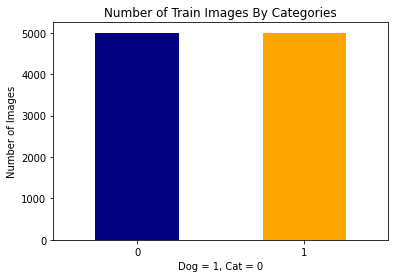

In [8]:
plt1 = df_train['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Train Images By Categories', rot=0)
plt1.set_ylabel("Number of Images")
plt1.set_xlabel("Dog = 1, Cat = 0")

Text(0.5, 0, 'Dog = 1, Cat = 0')

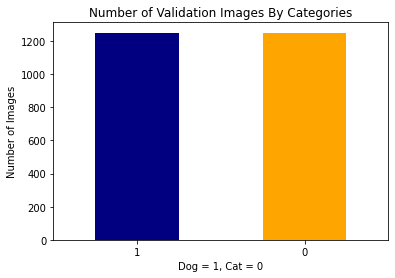

In [9]:
plt2 = df_val['category'].value_counts().plot(kind='bar', color=['navy','orange'], title='Number of Validation Images By Categories', rot=0)
plt2.set_ylabel("Number of Images")
plt2.set_xlabel("Dog = 1, Cat = 0")

####**Data Augmentation**

***Prepare train data for augmentation. Transfer cat and dog images into train folder***

In [10]:
train_dest = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'train')
for img in train_cat_images:
  os.rename(train_cat_dir + "/" + img, train_dest + "/" + img)

In [11]:
for img in train_dog_images:
  os.rename(train_dog_dir + "/" + img, train_dest + "/" + img)

***Create train data generator with augmentation settings***

In [12]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 10000 validated image filenames belonging to 2 classes.


***Comparing sample train image before and after augmentation.***


> ***Before:***





          filename category
9476  dog.1402.jpg        1


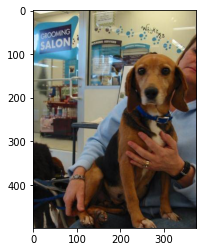

In [13]:
df_train_example = df_train.sample(n=1)
print(df_train_example)

sample = str(df_train_example.iloc[0]['filename'])

image = load_img("./IM4483-Mini-Proj/train/"+sample)
plt.imshow(image)



> ***After***



Found 1 validated image filenames belonging to 1 classes.


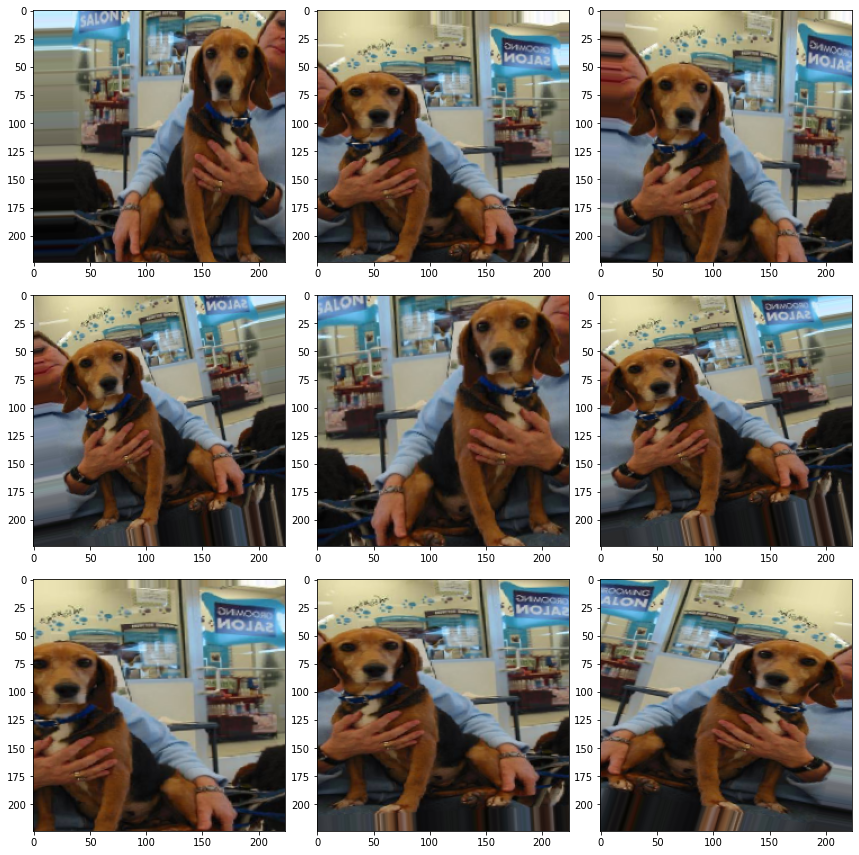

In [14]:
example_generator = train_datagen.flow_from_dataframe(
    df_train_example, 
    "./IM4483-Mini-Proj/train/", 
    x_col='filename',
    y_col='category',
    target_size=(image_size, image_size),
)

plt.figure(figsize=(12, 12))
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

***Prepare validation data for normalization. Transfer cat and dog images into validation folder***

In [15]:
val_dest = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'val')
for img in val_cat_images:
  os.rename(val_cat_dir + "/" + img, val_dest + "/" + img)

In [16]:
for img in val_dog_images:
  os.rename(val_dog_dir + "/" + img, val_dest + "/" + img)

***Create validation data generator with normalization***

In [17]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df_val, 
    "./IM4483-Mini-Proj/val/",
    x_col='filename',
    y_col='category',
    class_mode='binary',
    target_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2500 validated image filenames belonging to 2 classes.


###**Creating the Model**

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Constrain image size to 224x224, use pretrained weights
pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

x = Dropout(dropout)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.compile(loss=loss,
              optimizer=optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
              metrics=['accuracy'])

model.summary()

58900480/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

***Print layers with trainable parameters***

In [19]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 True
1 block1_conv1 True
2 block1_conv2 True
3 block1_pool True
4 block2_conv1 True
5 block2_conv2 True
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 global_max_pooling2d True
20 dense True
21 dropout True
22 dense_1 True


###**Training the Model**

In [20]:
total_train = df_train.shape[0]
total_validate = df_val.shape[0]

# fine-tune the model
# double forward slash is integer divison operation 
history = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/15
100/100 [==============================] - 346s 3s/step - loss: 0.3531 - accuracy: 0.8209 - val_loss: 0.0866 - val_accuracy: 0.9620
Epoch 2/15
100/100 [==============================] - 280s 3s/step - loss: 0.1052 - accuracy: 0.9607 - val_loss: 0.0765 - val_accuracy: 0.9728
Epoch 3/15
100/100 [==============================] - 280s 3s/step - loss: 0.0704 - accuracy: 0.9726 - val_loss: 0.0550 - val_accuracy: 0.9776
Epoch 4/15
100/100 [==============================] - 280s 3s/step - loss: 0.0632 - accuracy: 0.9747 - val_loss: 0.0530 - val_accuracy: 0.9808
Epoch 5/15
100/100 [==============================] - 280s 3s/step - loss: 0.0531 - accuracy: 0.9799 - val_loss: 0.0457 - val_accuracy: 0.9824
Epoch 6/15
100/100 [==============================] - 280s 3s/step - loss: 0.0504 - accuracy: 0.9818 - val_loss: 0.0772 - val_accuracy: 0.9700
Epoch 7/15
100/100 [==============================] - 280s 3s/step - loss: 0.0503 - accuracy: 0.9816 - val_loss: 0.0640 - val_accuracy: 0.9748

###**Evaluating the Model**

***Model Accuracy and Loss over Epochs***

In [21]:
loss, accuracy = model.evaluate_generator(validation_generator, total_validate//batch_size, workers=12)
print("Validation on Last Epoch: accuracy = %f  ;  loss = %f " % (accuracy, loss))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Validation on Last Epoch: accuracy = 0.981600  ;  loss = 0.060736 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  from ipykernel import kernelapp as app


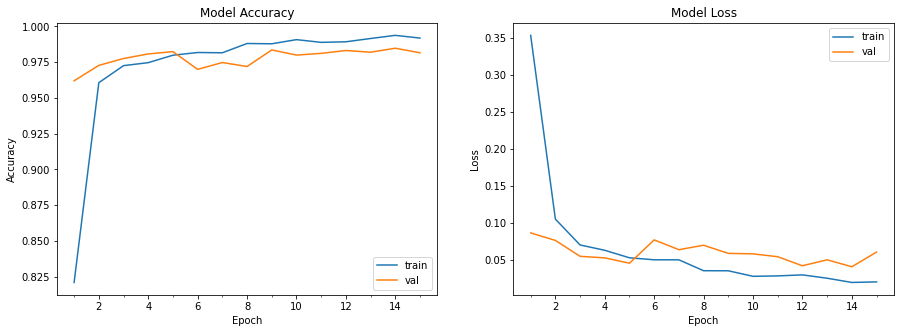

In [22]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history)

***Comparing predictions with true labels from validation data***

In [23]:
y_pred =  model.predict_generator(validation_generator)
y_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[1.0000000e+00],
       [3.6314873e-07],
       [1.0000000e+00],
       ...,
       [2.0702737e-05],
       [9.9993587e-01],
       [4.0538518e-05]], dtype=float32)

In [24]:
Y_val = df_val['category'].astype('int').to_numpy()
Y_val

array([0, 0, 0, ..., 1, 1, 1])

In [25]:
print(type(Y_val))
print(Y_val.size)

<class 'numpy.ndarray'>
2500


In [26]:
threshold = 0.5
y_final = np.where(y_pred > threshold, 1,0)

In [27]:
y_pred_2 = []
# y_final.size
for x in y_final:
  y_pred_2.append(x[0])
y_pred_2 = np.array(y_pred_2)
y_pred_2

array([1, 0, 1, ..., 0, 1, 0])

In [28]:
print(type(y_pred_2))
print(y_pred_2.size)

<class 'numpy.ndarray'>
2500


***Confusion Matrix, Precision, Recall, F1 Score***

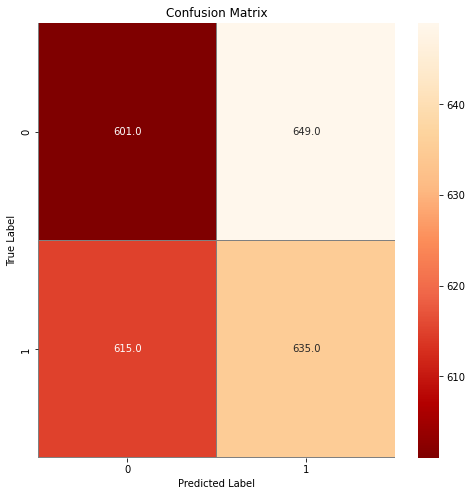

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Predict the values from the validation dataset

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_val, y_pred_2) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="OrRd_r",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [30]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_val, y_pred_2, target_names=['0','1'])

print(report)

              precision    recall  f1-score   support

           0       0.49      0.48      0.49      1250
           1       0.49      0.51      0.50      1250

    accuracy                           0.49      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.49      0.49      0.49      2500



###**Testing the Model**

***Prepare testing data***

In [31]:
test_dir = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'test')
test_images = os.listdir(test_dir)

df_test = pd.DataFrame({
  'filename': test_images
})

# df_test.shape
print(df_test)

    filename
0    143.jpg
1    208.jpg
2    393.jpg
3    338.jpg
4    306.jpg
..       ...
495  354.jpg
496  292.jpg
497   26.jpg
498  461.jpg
499  163.jpg

[500 rows x 1 columns]


***Augment test data***

In [32]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    "./IM4483-Mini-Proj/test/",
    x_col='filename',
    y_col=None,
    class_mode=None,
    batch_size=batch_size,
    target_size=(image_size, image_size),
    shuffle=False
)

Found 500 validated image filenames.


***Predictions on Test Data***

In [33]:
predict = model.predict_generator(test_generator, steps=np.ceil(df_test.shape[0]/batch_size))
threshold = 0.5
df_test['category'] = np.where(predict > threshold, 1,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


***Print sample test images with predicted labels***

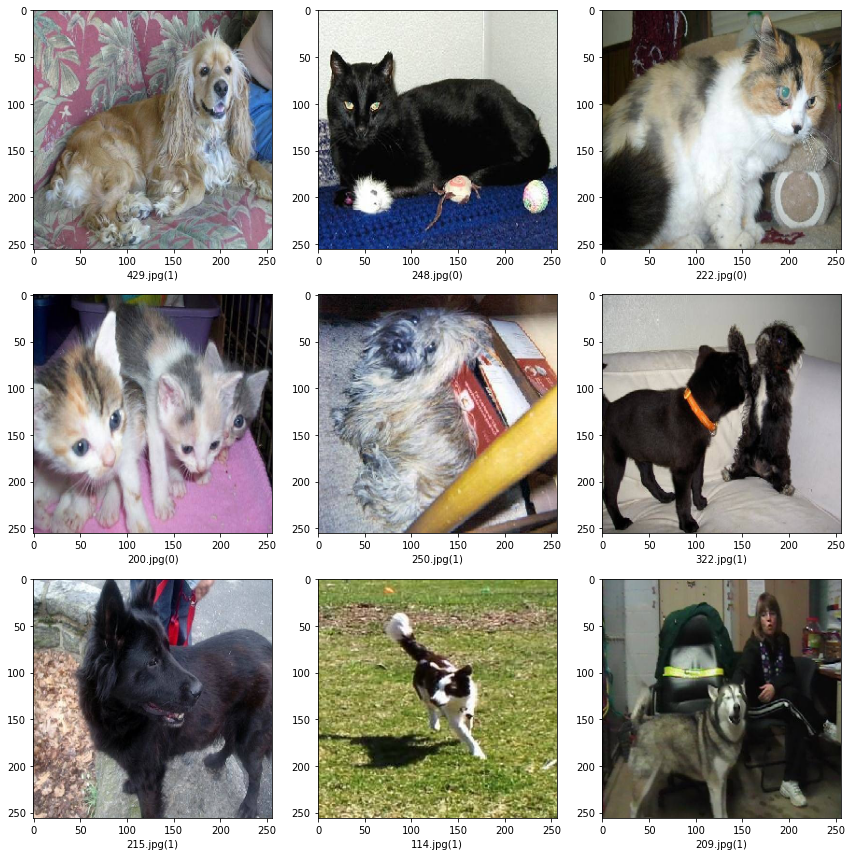

In [34]:
sample_test = df_test.sample(n=9).reset_index()
sample_test.head()
plt.figure(figsize=(12, 12))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("./IM4483-Mini-Proj/test/"+filename, target_size=(256, 256))
    plt.subplot(3, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
plt.tight_layout()
plt.show()

###**For Submission**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, '(Test data)')

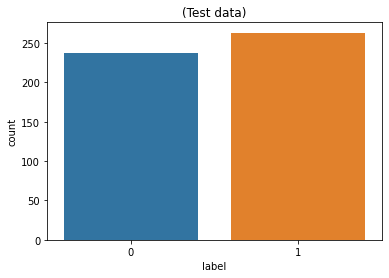

In [35]:
submission_df = df_test.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)

directory = os.path.join(os.getcwd(), 'IM4483-Mini-Proj', 'submission_jiadian.csv')

submission_df.to_csv('submission_jiadian.csv', index=False)
sns.countplot(submission_df['label'])
plt.title("(Test data)")

In [36]:
from google.colab import files
files.download("/content/submission_jiadian.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Part 2 - CIFAR-10**

###**Load and Prepare Dataset**

In [37]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

import random
import os

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

from keras.datasets import cifar10

***Define Parameters***

In [38]:
image_size = 32
input_shape = (image_size, image_size, 3)

epochs = 15
batch_size = 100

learning_rate = 0.001
dropout = 0.5
momentum = 0.9

loss='categorical_crossentropy'

In [39]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [40]:
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=.3)

In [41]:
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((35000, 32, 32, 3), (35000, 10))
((15000, 32, 32, 3), (15000, 10))
((10000, 32, 32, 3), (10000, 10))


In [42]:
type(x_train)

numpy.ndarray

In [43]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [44]:
train_datagen.fit(x_train)
validation_datagen.fit(x_val)
test_datagen.fit(x_test)

In [45]:
train_generator = train_datagen.flow(x_train,y_train,batch_size=batch_size)
val_generator = validation_datagen.flow(x_val,y_val,batch_size=batch_size)
test_generator = test_datagen.flow(x_test,y_test,batch_size=batch_size)

###***Preparing and Training the Model***

In [46]:
# Constrain image size to 32x32, use pretrained weights
pre_trained_model2 = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")
    
last_layer = pre_trained_model2.get_layer('block5_pool')
last_output = last_layer.output
    
# Flatten the output layer to 1 dimension
layer = GlobalMaxPooling2D()(last_output)

# Add a fully connected layer with 512 hidden units and ReLU activation
layer = Dense(512, activation='relu')(layer)

layer = Dropout(dropout)(layer)

# Add a final sigmoid layer for classification
add_layers = layers.Dense(10, activation='softmax')(layer)

model2 = Model(pre_trained_model2.input, add_layers)

model2.compile(loss=loss,
              optimizer=optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
              metrics=['accuracy'])

model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [47]:
# history = model.fit_generator(
#     train_generator,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=total_validate//batch_size,
#     steps_per_epoch=total_train//batch_size)

history2 = model2.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=x_val.shape[0]//batch_size,
    steps_per_epoch=x_train.shape[0]//batch_size)

Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  del sys.path[0]


350/350 [==============================] - 48s 127ms/step - loss: 1.4254 - accuracy: 0.4927 - val_loss: 0.9004 - val_accuracy: 0.6857
Epoch 2/15
350/350 [==============================] - 45s 129ms/step - loss: 0.9369 - accuracy: 0.6786 - val_loss: 0.7060 - val_accuracy: 0.7533
Epoch 3/15
350/350 [==============================] - 45s 128ms/step - loss: 0.7982 - accuracy: 0.7278 - val_loss: 0.6692 - val_accuracy: 0.7731
Epoch 4/15
350/350 [==============================] - 45s 128ms/step - loss: 0.7106 - accuracy: 0.7563 - val_loss: 0.6460 - val_accuracy: 0.7795
Epoch 5/15
350/350 [==============================] - 45s 127ms/step - loss: 0.6496 - accuracy: 0.7772 - val_loss: 0.5489 - val_accuracy: 0.8113
Epoch 6/15
350/350 [==============================] - 45s 128ms/step - loss: 0.6129 - accuracy: 0.7919 - val_loss: 0.5663 - val_accuracy: 0.8045
Epoch 7/15
350/350 [==============================] - 44s 126ms/step - loss: 0.5749 - accuracy: 0.8048 - val_loss: 0.5538 - val_accuracy: 0.8

KeyboardInterrupt: ignored

In [ ]:
def plot_model_history(model_history, acc='accuracy', val_acc='val_accuracy'):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    axs[0].plot(range(1,len(model_history.history[acc])+1),model_history.history[acc])
    axs[0].plot(range(1,len(model_history.history[val_acc])+1),model_history.history[val_acc])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history[acc])+1),len(model_history.history[acc])/10)
    axs[0].legend(['train', 'val'], loc='best')
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()
    
plot_model_history(history2)

###***Testing and Results*** 

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

In [ ]:
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

y_pred=np.argmax(model2.predict(x_test), axis=1)
y_true=np.argmax(y_test,axis=1)

#Compute the confusion matrix
confusion_mtx=confusion_matrix(y_true,y_pred)

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

In [ ]:
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')